# SVD & Low-Rank Approximation

---

## What is this?

This notebook shows how **Singular Value Decomposition (SVD)**  
generalizes the idea of diagonalization for any matrix, even non-square ones.

---

## Core idea

- Any matrix `A` can be factored as:
  $
  A = U \Sigma V^T.
  $
- `V^T` rotates the input into a new orthogonal basis.
- `Σ` scales along these axes (like eigenvalues).
- `U` rotates the output into the final space.
- SVD is useful for:
  - Dimensionality reduction
  - Low-rank approximation
  - Image compression
  - Noise filtering

---

## What we’ll do

1. Load or create a simple grayscale image matrix  
2. Compute its SVD: `U Σ V^T`  
3. Keep only the top `k` singular values → Low-rank approximation  
4. Visualize the reconstructed image vs. the original  
5. Interpret how SVD shows the “essential directions”

---

## Goal

> See how SVD rewrites any matrix as a sequence of rotations and scalings,  
> and how cutting off small singular values gives you a simpler approximation.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
A = np.random.rand(50, 50)

In [4]:
U, S, VT = np.linalg.svd(A, full_matrices=False)

print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of VT:", VT.shape)

Shape of U: (50, 50)
Shape of S: (50,)
Shape of VT: (50, 50)


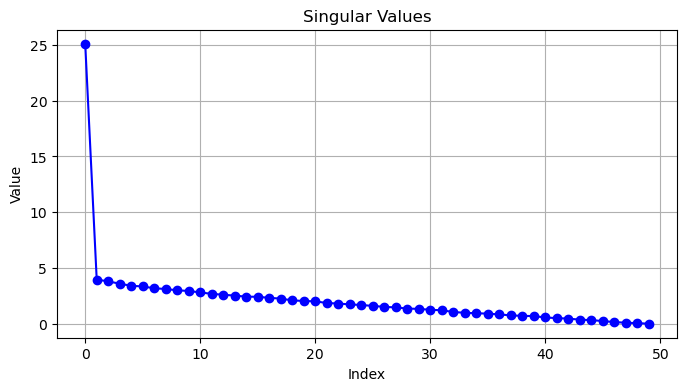

In [5]:
plt.figure(figsize=(8,4))
plt.plot(S, 'bo-')
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

Original shape: (50, 50)
Approx shape: (50, 50)


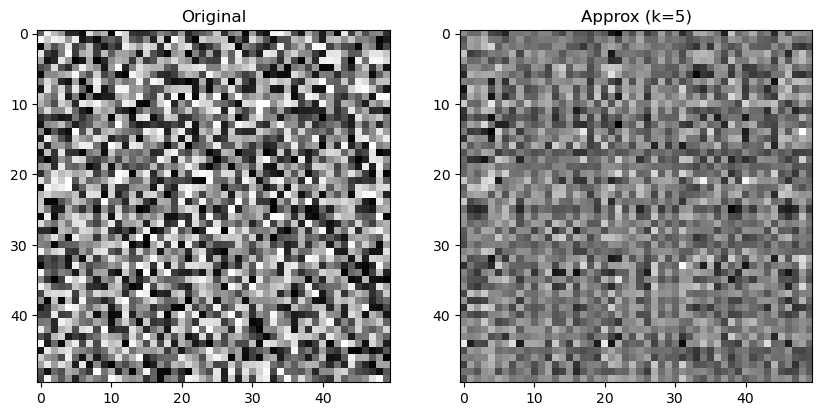

In [13]:
# Keep top k singular values
k = 5

# Zero out the rest
S_k = np.zeros((k,k))
np.fill_diagonal(S_k, S[:k])

U_k = U[:, :k]
VT_k = VT[:k, :]

# Reconstruct
A_approx = U_k @ S_k @ VT_k

print("Original shape:", A.shape)
print("Approx shape:", A_approx.shape)

# Visualize original vs approx
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(A, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(A_approx, cmap='gray')
axes[1].set_title(f"Approx (k={k})")
plt.show()


## Interpretation

- The original image matrix `A` can be written as:
  $
  A = U \Sigma V^T.
  $
- `V^T` rotates the input space into a basis where directions are uncorrelated.
- `Σ` scales along these directions (the singular values).
- `U` rotates into the final output space.
- Keeping only the largest `k` singular values keeps the most important information (variance) while discarding noise.
- This is why SVD is the backbone of many compression techniques like JPEG.

> SVD is like a more general version of diagonalization:  
> it finds the best “axes” to describe the data with minimal redundancy.


## Interpretation – k Parameter

- The `k` parameter controls how many singular values you keep.
- Each singular value represents how much information is carried along that direction.
- Keeping all singular values (k = rank of A) means you lose nothing:
  $
  A_{approx} = A.
  $
- Reducing `k` drops less important directions → smaller data, lower detail.
- This tradeoff is why SVD is used for image compression:
  - Keep only what matters.
  - Discard what your eyes won't notice.

> So yes, `k = full rank` means no compression → the original image comes back exactly!


## Interpretation – Scree Plot

- The Scree Plot shows the distribution of singular values.
- Each singular value represents how much "energy" or variance that direction carries.
- A sharp drop means that a few directions capture most of the structure.
- This tells you how well the matrix can be compressed:
  - Keep the big singular values → retain the main features.
  - Discard the small ones → remove noise or fine detail.
- This is exactly the idea behind low-rank approximation and PCA.

> **Scree Plot** = A visual way to see "which directions matter, which can be ignored".
